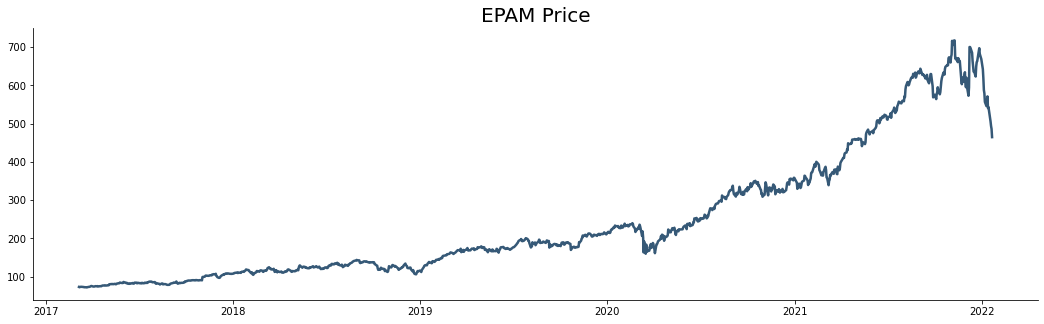

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler

rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5


# Load
df = pd.read_csv('epam.csv', index_col='Date', parse_dates=True)

# Visualize
plt.title('EPAM Price', size=20)
plt.plot(df);

In [2]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report
from sklearn.metrics import mean_squared_error

In [3]:
df

,EPAM
Date,
2017-03-06,73.32
2017-03-07,72.58
2017-03-08,73.32
2017-03-09,73.58
2017-03-10,73.79
...,...
2022-01-14,543.06
2022-01-18,505.95
2022-01-19,493.98


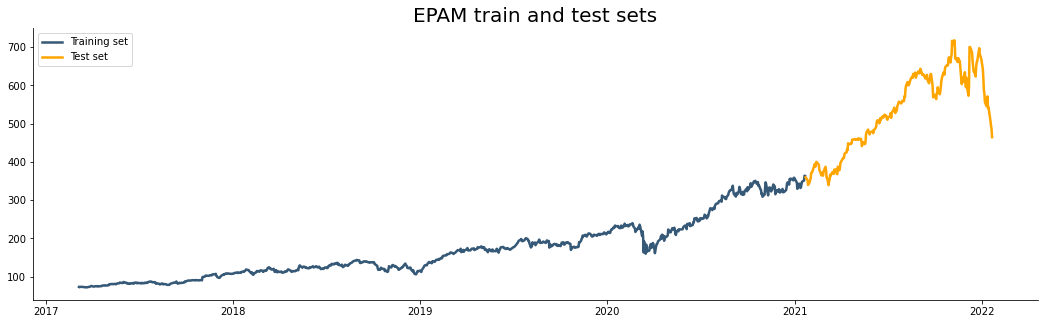

In [4]:
test_size = 253


df_train = df[:-test_size]
df_test = df[-test_size:]

plt.title('EPAM train and test sets', size=20)
plt.plot(df_train, label='Training set')
plt.plot(df_test, label='Test set', color='orange')
plt.legend();

In [5]:
from fbprophet import Prophet as proph

In [6]:
df_train

,EPAM
Date,
2017-03-06,73.32
2017-03-07,72.58
2017-03-08,73.32
2017-03-09,73.58
2017-03-10,73.79
...,...
2021-01-14,340.65
2021-01-15,348.01
2021-01-19,351.41


In [7]:
df_train.reset_index(inplace=True)

In [8]:
df_test

,EPAM
Date,
2021-01-22,359.69
2021-01-25,354.15
2021-01-26,350.75
2021-01-27,339.62
2021-01-28,348.97
...,...
2022-01-14,543.06
2022-01-18,505.95
2022-01-19,493.98


In [9]:
df_test.reset_index(inplace=True)

In [10]:
# Rename the columns [Date,AAPL] to [ds, y]

ts = df_train

ts = df_train.rename(columns={'Date': 'ds',
                        'EPAM': 'y'})

ts_test = df_test.rename(columns={'Date': 'ds',
                        'EPAM': 'y'})
ts.head(5)


,ds,y
0,2017-03-06,73.32
1,2017-03-07,72.58
2,2017-03-08,73.32
3,2017-03-09,73.58
4,2017-03-10,73.79


In [11]:
x_test = ts_test[['ds']]

In [12]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

Model = proph(interval_width=0.95,daily_seasonality=True)

In [13]:
# Fit the timeseries into Model
Model.fit(ts)

In [14]:
# USe make_future_dataframe with a monthly frequency and periods = 759 for 3 years
future_dates = Model.make_future_dataframe(periods=759, freq='D')
future_dates.tail()


,ds
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18
1736,2023-02-19


In [15]:
future_dates

,ds
0,2017-03-06
1,2017-03-07
2,2017-03-08
3,2017-03-09
4,2017-03-10
...,...
1732,2023-02-15
1733,2023-02-16
1734,2023-02-17
1735,2023-02-18


In [16]:
future_dates= future_dates.loc[future_dates['ds'] >= '2021-01-22']

In [17]:
x_test = pd.DataFrame(x_test)

In [18]:
x_test

,ds
0,2021-01-22
1,2021-01-25
2,2021-01-26
3,2021-01-27
4,2021-01-28
...,...
248,2022-01-14
249,2022-01-18
250,2022-01-19
251,2022-01-20


In [19]:
# Predict the values for future dates and take the head of forecast

predicitons = Model.predict(x_test)


In [20]:
forecast = Model.predict(future_dates)

In [21]:
forecast.tail() 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
754,2023-02-15,766.738369,96.592931,1476.608857,86.260238,1454.763173,16.970329,16.970329,16.970329,15.849595,...,0.787397,0.787397,0.787397,0.333337,0.333337,0.333337,0.0,0.0,0.0,783.708698
755,2023-02-16,767.288238,95.674100,1480.844137,86.154710,1456.729827,17.288829,17.288829,17.288829,15.849595,...,1.071371,1.071371,1.071371,0.367863,0.367863,0.367863,0.0,0.0,0.0,784.577067
756,2023-02-17,767.838107,94.314296,1486.815857,85.894389,1458.769139,17.337407,17.337407,17.337407,15.849595,...,1.087253,1.087253,1.087253,0.400559,0.400559,0.400559,0.0,0.0,0.0,785.175514
757,2023-02-18,768.387976,89.853698,1482.875951,84.841299,1460.808451,14.295482,14.295482,14.295482,15.849595,...,-1.981200,-1.981200,-1.981200,0.427086,0.427086,0.427086,0.0,0.0,0.0,782.683457
758,2023-02-19,768.937844,95.693767,1485.528177,83.787500,1462.847762,14.310638,14.310638,14.310638,15.849595,...,-1.981200,-1.981200,-1.981200,0.442243,0.442243,0.442243,0.0,0.0,0.0,783.248483


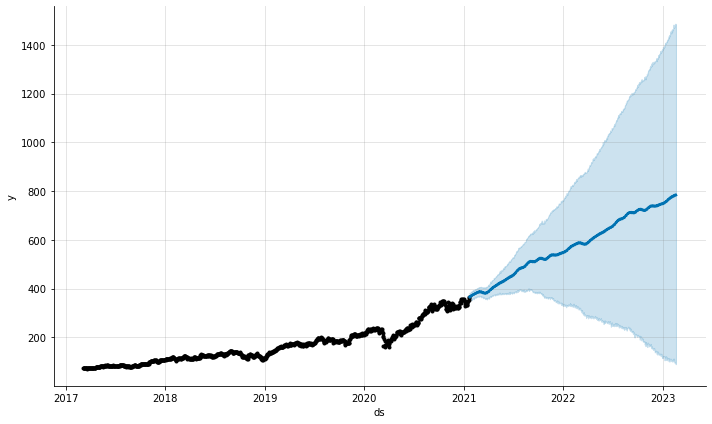

In [22]:
# Use prophet's plot function to plot the predictions

Model.plot(forecast, uncertainty=True)
plt.show()

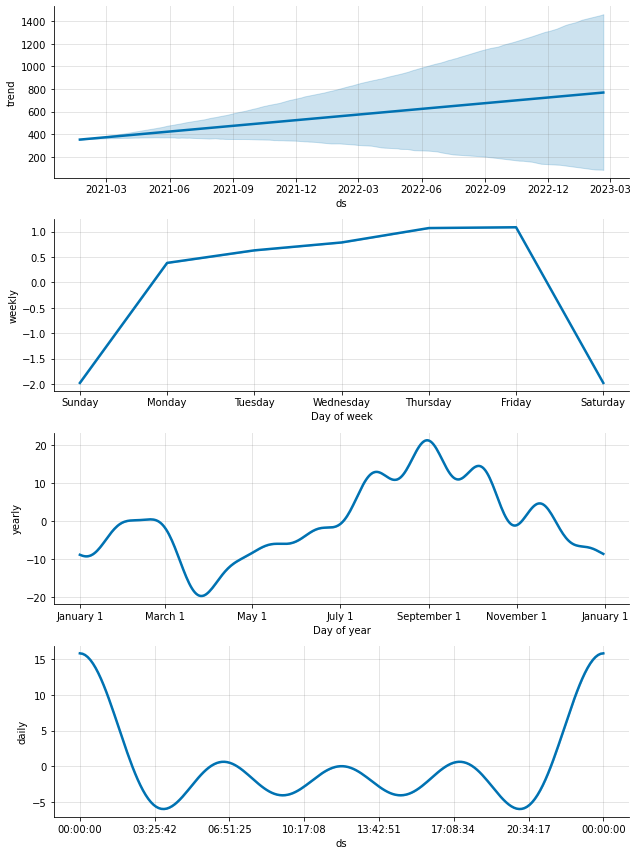

In [23]:
Model.plot_components(forecast)
plt.show()

In [24]:
df_test = pd.concat([df_test,predicitons], axis=1)
df_test

,Date,EPAM,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,359.69,2021-01-22,352.137207,349.312672,382.164005,352.137207,352.137207,13.503450,13.503450,...,1.087253,1.087253,1.087253,-3.433398,-3.433398,-3.433398,0.0,0.0,0.0,365.640657
1,2021-01-25,354.15,2021-01-25,353.786814,352.151381,384.994611,353.725135,353.786814,14.161623,14.161623,...,0.384605,0.384605,0.384605,-2.072577,-2.072577,-2.072577,0.0,0.0,0.0,367.948436
2,2021-01-26,350.75,2021-01-26,354.336682,352.144657,385.840310,354.179037,354.350340,14.796533,14.796533,...,0.631773,0.631773,0.631773,-1.684836,-1.684836,-1.684836,0.0,0.0,0.0,369.133215
3,2021-01-27,339.62,2021-01-27,354.886551,353.516408,386.755871,354.604601,354.997279,15.301298,15.301298,...,0.787397,0.787397,0.787397,-1.335694,-1.335694,-1.335694,0.0,0.0,0.0,370.187850
4,2021-01-28,348.97,2021-01-28,355.436420,355.637202,387.733803,355.055972,355.579592,15.894085,15.894085,...,1.071371,1.071371,1.071371,-1.026881,-1.026881,-1.026881,0.0,0.0,0.0,371.330506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,543.06,2022-01-14,548.440409,305.538283,767.195441,296.475803,756.702349,9.392736,9.392736,...,1.087253,1.087253,1.087253,-7.544112,-7.544112,-7.544112,0.0,0.0,0.0,557.833145
249,2022-01-18,505.95,2022-01-18,550.639885,297.349271,777.850337,293.598083,761.951513,10.849145,10.849145,...,0.631773,0.631773,0.631773,-5.632224,-5.632224,-5.632224,0.0,0.0,0.0,561.489030
250,2022-01-19,493.98,2022-01-19,551.189754,305.400489,784.912949,292.889708,763.258045,11.527395,11.527395,...,0.787397,0.787397,0.787397,-5.109598,-5.109598,-5.109598,0.0,0.0,0.0,562.717149
251,2022-01-20,486.07,2022-01-20,551.739623,301.916450,777.294204,292.181333,764.564577,12.336438,12.336438,...,1.071371,1.071371,1.071371,-4.584528,-4.584528,-4.584528,0.0,0.0,0.0,564.076061


In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,352.137207,350.099866,382.610791,352.137207,352.137207,13.503450,13.503450,13.503450,15.849595,...,1.087253,1.087253,1.087253,-3.433398,-3.433398,-3.433398,0.0,0.0,0.0,365.640657
1,2021-01-23,352.687076,347.086906,378.607483,352.687076,352.690836,10.917077,10.917077,10.917077,15.849595,...,-1.981200,-1.981200,-1.981200,-2.951318,-2.951318,-2.951318,0.0,0.0,0.0,363.604153
2,2021-01-24,353.236945,349.796313,380.366683,353.236945,353.304722,11.372340,11.372340,11.372340,15.849595,...,-1.981200,-1.981200,-1.981200,-2.496056,-2.496056,-2.496056,0.0,0.0,0.0,364.609284
3,2021-01-25,353.786814,352.196267,383.974137,353.766117,353.953415,14.161623,14.161623,14.161623,15.849595,...,0.384605,0.384605,0.384605,-2.072577,-2.072577,-2.072577,0.0,0.0,0.0,367.948436
4,2021-01-26,354.336682,353.182806,384.743834,354.202906,354.600105,14.796533,14.796533,14.796533,15.849595,...,0.631773,0.631773,0.631773,-1.684836,-1.684836,-1.684836,0.0,0.0,0.0,369.133215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754,2023-02-15,766.738369,96.592931,1476.608857,86.260238,1454.763173,16.970329,16.970329,16.970329,15.849595,...,0.787397,0.787397,0.787397,0.333337,0.333337,0.333337,0.0,0.0,0.0,783.708698
755,2023-02-16,767.288238,95.674100,1480.844137,86.154710,1456.729827,17.288829,17.288829,17.288829,15.849595,...,1.071371,1.071371,1.071371,0.367863,0.367863,0.367863,0.0,0.0,0.0,784.577067
756,2023-02-17,767.838107,94.314296,1486.815857,85.894389,1458.769139,17.337407,17.337407,17.337407,15.849595,...,1.087253,1.087253,1.087253,0.400559,0.400559,0.400559,0.0,0.0,0.0,785.175514
757,2023-02-18,768.387976,89.853698,1482.875951,84.841299,1460.808451,14.295482,14.295482,14.295482,15.849595,...,-1.981200,-1.981200,-1.981200,0.427086,0.427086,0.427086,0.0,0.0,0.0,782.683457


In [26]:
mean_squared_error(df_test.EPAM,df_test.yhat,squared=False)

81.3129967643592

In [27]:
ROI = (359.69/768.937844)*100
ROI

46.77751300793045

In [28]:
ROI = (464.71/768.937844)*100
ROI

60.435313936765986

# Concating EPAM DF

In [29]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

,ds,yhat
372,2022-01-29,569.734705
373,2022-01-30,570.522063
374,2022-01-31,573.635903
375,2022-02-01,574.594061
376,2022-02-02,575.426753
...,...,...
754,2023-02-15,783.708698
755,2023-02-16,784.577067
756,2023-02-17,785.175514
757,2023-02-18,782.683457


In [30]:
concat_df.set_index('ds',inplace=True)

In [31]:
concat_df

,yhat
ds,
2022-01-29,569.734705
2022-01-30,570.522063
2022-01-31,573.635903
2022-02-01,574.594061
2022-02-02,575.426753
...,...
2023-02-15,783.708698
2023-02-16,784.577067
2023-02-17,785.175514


In [32]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


In [33]:
concat_df.columns = ['y']

In [34]:
df_test

,Date,EPAM,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-22,359.69,2021-01-22,352.137207,349.312672,382.164005,352.137207,352.137207,13.503450,13.503450,...,1.087253,1.087253,1.087253,-3.433398,-3.433398,-3.433398,0.0,0.0,0.0,365.640657
1,2021-01-25,354.15,2021-01-25,353.786814,352.151381,384.994611,353.725135,353.786814,14.161623,14.161623,...,0.384605,0.384605,0.384605,-2.072577,-2.072577,-2.072577,0.0,0.0,0.0,367.948436
2,2021-01-26,350.75,2021-01-26,354.336682,352.144657,385.840310,354.179037,354.350340,14.796533,14.796533,...,0.631773,0.631773,0.631773,-1.684836,-1.684836,-1.684836,0.0,0.0,0.0,369.133215
3,2021-01-27,339.62,2021-01-27,354.886551,353.516408,386.755871,354.604601,354.997279,15.301298,15.301298,...,0.787397,0.787397,0.787397,-1.335694,-1.335694,-1.335694,0.0,0.0,0.0,370.187850
4,2021-01-28,348.97,2021-01-28,355.436420,355.637202,387.733803,355.055972,355.579592,15.894085,15.894085,...,1.071371,1.071371,1.071371,-1.026881,-1.026881,-1.026881,0.0,0.0,0.0,371.330506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2022-01-14,543.06,2022-01-14,548.440409,305.538283,767.195441,296.475803,756.702349,9.392736,9.392736,...,1.087253,1.087253,1.087253,-7.544112,-7.544112,-7.544112,0.0,0.0,0.0,557.833145
249,2022-01-18,505.95,2022-01-18,550.639885,297.349271,777.850337,293.598083,761.951513,10.849145,10.849145,...,0.631773,0.631773,0.631773,-5.632224,-5.632224,-5.632224,0.0,0.0,0.0,561.489030
250,2022-01-19,493.98,2022-01-19,551.189754,305.400489,784.912949,292.889708,763.258045,11.527395,11.527395,...,0.787397,0.787397,0.787397,-5.109598,-5.109598,-5.109598,0.0,0.0,0.0,562.717149
251,2022-01-20,486.07,2022-01-20,551.739623,301.916450,777.294204,292.181333,764.564577,12.336438,12.336438,...,1.071371,1.071371,1.071371,-4.584528,-4.584528,-4.584528,0.0,0.0,0.0,564.076061


In [35]:
df2 = df_test[['Date','EPAM']]

In [36]:
df2.set_index('Date',inplace=True)

In [37]:
temp_ds = ts.set_index('ds')

In [38]:
df2.columns = ['y']

In [39]:
final_df= pd.concat([temp_ds,df2,concat_df])
final_df

,y
2017-03-06,73.320000
2017-03-07,72.580000
2017-03-08,73.320000
2017-03-09,73.580000
2017-03-10,73.790000
...,...
2023-02-15,783.708698
2023-02-16,784.577067
2023-02-17,785.175514
2023-02-18,782.683457


In [42]:
final_df.to_csv('EPAM_final.csv')

In [43]:
concat_df = forecast.loc[forecast['ds'] >= '2022-01-29'][['ds','yhat']]
concat_df

concat_df.set_index('ds',inplace=True)

concat_df

concat_df.info()

concat_df.columns = ['y']

df_test

df2 = df_test[['Date','EPAM']]

df2.set_index('Date',inplace=True)

temp_ds = ts.set_index('ds')

df2.columns = ['y']

final_df= pd.concat([temp_ds,df2,concat_df])
final_df

final_df.to_csv('EPAM_final.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 387 entries, 2022-01-29 to 2023-02-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yhat    387 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB
